<a href="https://colab.research.google.com/github/web2webs/labs/blob/main/Tabular_SARSA_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
# generate random map with source and destination, and size map_size by map_size

map_size = 10
destination = np.array([4,4]) #np.random.random_integers(0, map_size-1, 2)

game_map = np.zeros((map_size, map_size)) 
game_map[destination[0], destination[1]] = 1
print(game_map)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
number_actions = 4
Q = np.random.random((map_size, map_size, number_actions)) #np.zeros((map_size, map_size, number_actions)) #

Actions = np.array([[0, -1], [0, 1],[-1, 0],[1, 0]]) # np.array([[1, 0], [0, 1]]) #
eps = 0.1 # not following strategy probability, exploration rate
gamma = 0.9 # discount factor
alpha = 0.01 # learning rate
l = 0.1 # TD learning parameter

stats = [[], []]
for i in range(1000):
    #print ("iteration: ", i)
    # initialize the ET (elegibility traces) matrix with zerose
    ET = np.zeros((map_size, map_size, number_actions))
    deltas = []
    while True:
        # select starting state
        S = np.random.random_integers(0, map_size-1, 2)
        if (destination != S).all():
            break
    # select random starting action
    action_arg = np.random.choice(list(range(number_actions)),1)[0]
    action = Actions[action_arg]
    while (destination != S).any():
        # take action A in state S to move to next state new_S
        new_S = (S + action + 10)%10
        if (destination == new_S).all() :
            reward = 10
        else:
            reward = 0
        # Select the best action in new_state following the Q function and the epsilon gredy strategy 
        from_Q = np.random.choice([True, False], p= [1-eps, eps])
        
        if from_Q:
            new_action_arg = np.argmax(Q[new_S[0], new_S[1]])
        else:
            new_action_arg = np.random.choice(list(range(number_actions)),1)[0]
        
        new_action = Actions[new_action_arg]
        
        delta = reward + gamma * Q[new_S[0], new_S[1], new_action_arg ] - Q[S[0], S[1], action_arg ]
        deltas.append(delta)

        # increment state in ET (accumulating traces technique )

        #ET[S[0], S[1], action_arg ] +=1
        ET[S[0], S[1], action_arg ] = 1
        # Update Q function
        Q = Q + alpha*delta*ET
        # Update ET matrix
        ET = l*gamma*ET

        S = new_S
        action = new_action
    mean_delta = np.mean(deltas)
    var_delta = np.var(deltas)
    stats[0].append(mean_delta)
    stats[1].append(var_delta)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead


In [5]:
mapper =  {0:"↑",1:"↓",2:"←",3:"→"} #{1:"↓",0:"→"} #
moves = np.apply_along_axis(lambda x : mapper[np.argmax(x)], 2, Q)
print(moves)

[['←' '←' '↓' '↓' '↓' '↓' '↓' '←' '←' '←']
 ['↓' '↓' '→' '→' '↑' '↓' '↓' '←' '←' '→']
 ['←' '↓' '↑' '↑' '→' '↓' '↑' '←' '↑' '↑']
 ['→' '↑' '←' '←' '↓' '↑' '↓' '↓' '→' '→']
 ['↓' '↑' '←' '↑' '↑' '→' '↑' '→' '→' '↓']
 ['↓' '→' '↑' '↑' '↑' '↑' '↑' '↓' '↑' '←']
 ['↑' '←' '→' '↑' '↓' '↓' '↓' '↓' '↓' '→']
 ['↑' '→' '↓' '↓' '→' '←' '↑' '↑' '↓' '↓']
 ['↑' '↓' '↑' '↓' '↓' '↑' '↓' '↓' '↑' '↓']
 ['↑' '→' '↓' '↓' '↓' '↓' '↓' '↓' '→' '←']]


In [6]:
from matplotlib import pyplot

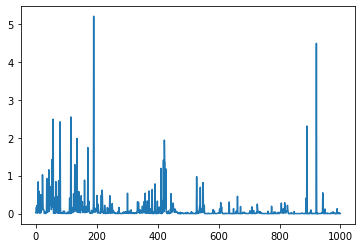

In [7]:
pyplot.plot(stats[0])

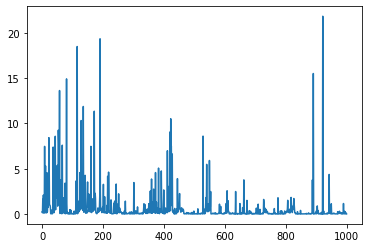

In [8]:
pyplot.plot(stats[1])

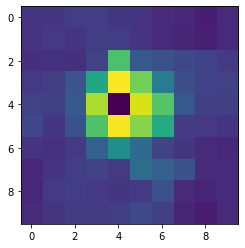

In [10]:
fig, ax = pyplot.subplots()
im = ax.imshow(np.apply_along_axis(lambda x : np.max(x), 2, Q))
